In [1]:
#### Ocutar linhas de código

import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
toggle_code(False)

In [2]:
import codigos_apresentacao
import pandas as pd
from scatter import scatter, plotcorr
from plots import trend, xsml, trend_years
data = pd.read_pickle("data.pickle")
corr = pd.read_pickle("corrGDP2017.pickle")

## Motivação:
A discussão acerca do que torna os países pobres ou ricos é um debate acalorado na literatura. Liberalismo econômico, industrialização, educação entre outros fatores exercem influência sobre a trajetória da taxa de crescimento do PIB per capita, além de fatos históricos isolados. O comércio exterior, por exemplo, é um dos aspectos que causam impacto no crescimento econômico, contudo, durante o século XX, alguns países como a Austrália e o Canadá exportavam basicamente commodities, por outro lado países como a Inglaterra e Alemanha exportavam produtos industrializados, porém tanto a Austrália quanto o Canadá atingiram níveis altos de desenvolvimento e PIB per capita. Dessa forma, quais fatores teriam mais importância no crescimento econômico? É possível combinar vários fatores e prever o crescimento de um país nos próximos anos?

### Tentando encontrar um modelo que represente de forma eficente nivel de correlação entre dois índices

### Como medir nivel de correlação? 

Niveis de correlação podem ser obtidos apartir de curvas, como curva linear, curva de potência, curva polinomial  e curva exponencial, e todas essas curvas podem ser aproximadas com regressões lineares com alterações nas escalas dos dados: 

#### 1. Curva linear  ->   Y = a*X + b

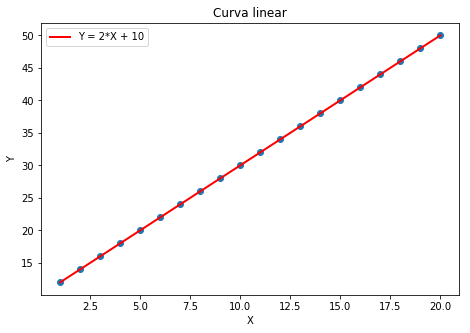

In [3]:
codigos_apresentacao.func1()

#### 2.  Curva exponencial ->  Y = a*log(X) + b

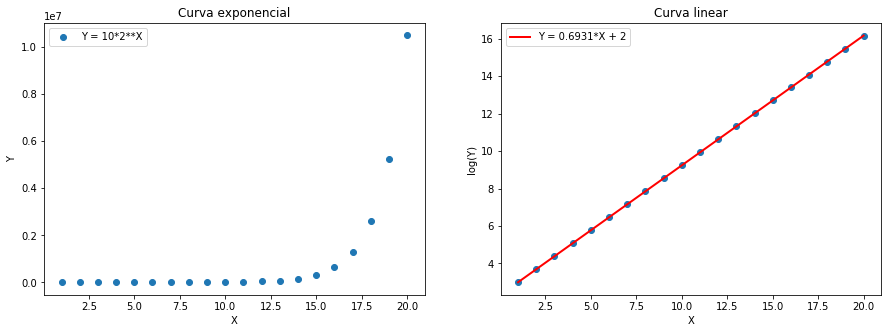

In [4]:
codigos_apresentacao.func2()

#### 3. Curva de potência e curva polinomial -> log(Y) = a*log(X) + b 

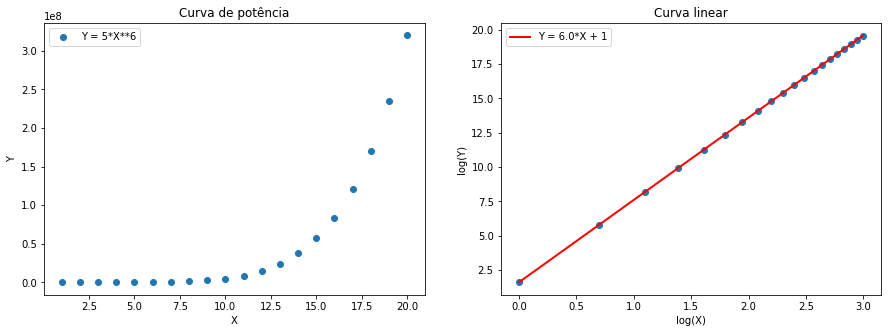

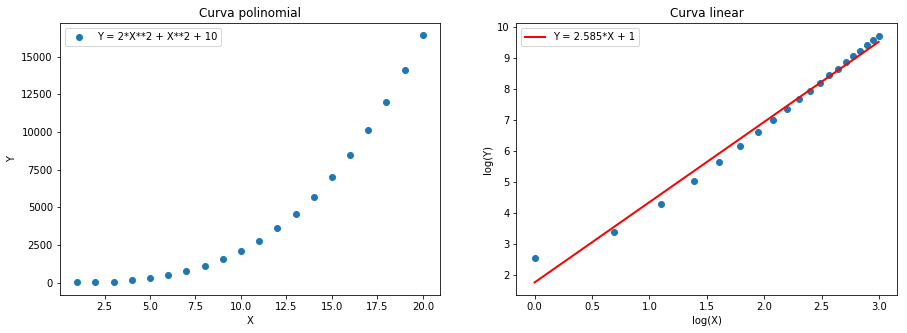

In [5]:
codigos_apresentacao.func3()

#### Agora como descobrir a curva que melhor se encaixa? Testando!

A partir das alterações nas escalas: x - y, x - log(x), y - log(x) e log(x) - log(y), e aplicando a regressão linear, é possível descobrir qual curva obteve o melhor resultado e podendo assim avaliar o nível de correlação.

Existe um probleminha: dados negativos ou nulos, com esses tipos de dados não é possível aplicar o log, então nesses casos é aplicado a raiz cubica (y**(1/3)) que possui um efeito similar ao log, mas com resultados um pouco mais fracos.

#### Como avaliar um resultado? 

Coeficiente de determinação (R2) da regressão linear, em resumo esse modelo avalia a distância total de cada ponto a reta. O coeficiente varia de 0 a 1, sendo 1 o ajuste perfeito a curva.

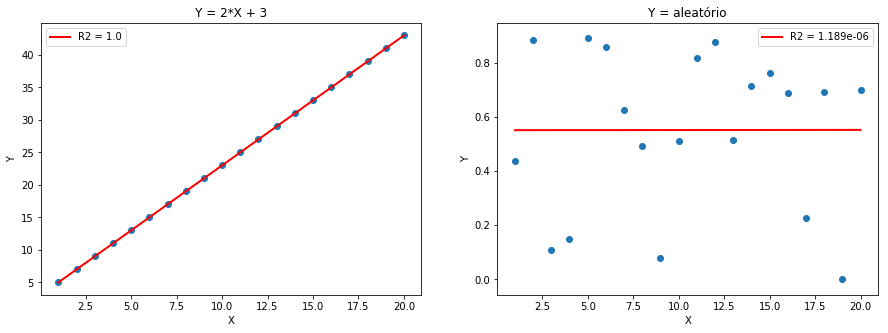

In [6]:
codigos_apresentacao.func4()

#### Outileres

Alguns pontos que podem ser casos isolados que acabam fud... atrapalhando um pouco a curva, por estarem muito distantes da reta que melhor se ajustaria aos outros pontos. Esses pontos são removidos de forma eficiente da regressão para melhor resultados. Futuramente será mostrado um caso real de outliers

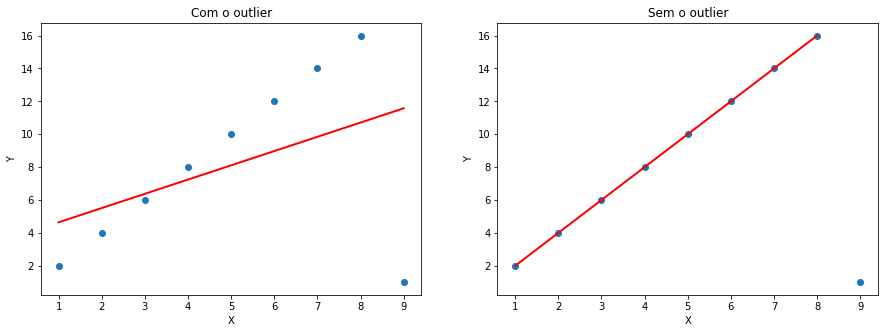

In [7]:
codigos_apresentacao.func5()

#### Conclusão:
Agora podemos medir o nivel de correlação entre dois indices a partir do coeficiente de determinação da curva que melhor se encaixa, avaliando assim se existe algum tipo de "padrão".

### Correlação entre indices e o PIB per capita de 2017

In [8]:
plotcorr(corr, 0.8)

### Correlação entre uso de engergia elétrica e PIB per capita

#### [Link para animação](https://plot.ly/~Felvc027/36/)

In [9]:
scatter(data, ['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'], [2008, 2008])

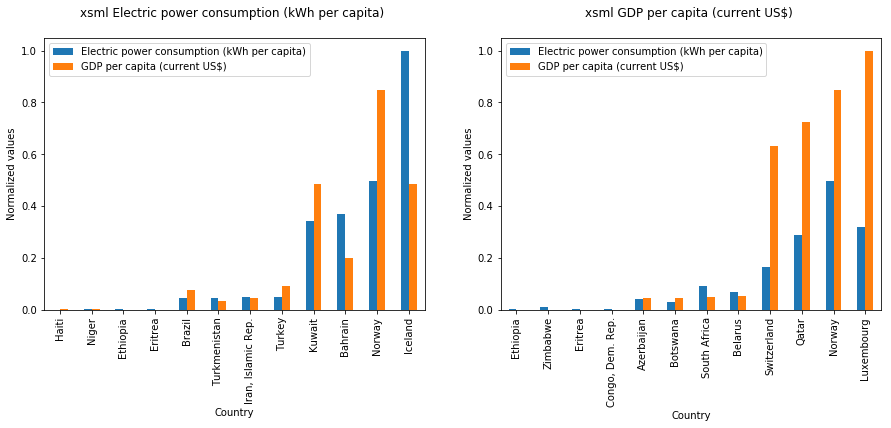

In [10]:
xsml(data,  ['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'], [2008, 2008], 4)

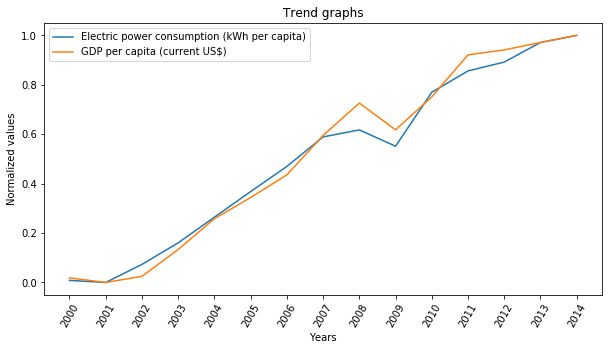

In [11]:
trend_years(data, ['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'], 'World', [2000, 2017])

#### Análise: 
O aumento da população urbana e a mudança do estilo de vida das pessoas aumenta a demana por energia. A maior demana por energia atrai investimento estrangeiro direto, aumentando diretamente o PIB e também aumenta a quantidade de empregos que implica enfim no aumento do consumo privado, aumentando suficientemente o PIB para que mesmo com um possível aumento da população ocorra o aumento do PIB per capita. Contudo isso ocorre no longo prazo. No curto prazo como já observado no gráfico ha variação é pequena é a explicação é que além do investimento direto precisar de tempo para gerar retorno, aumento do uso de energia elétrica pode ser causada por exemplo pelo aumento do uso de ar condicionado que não está diretamente ligada a produção daquele país.

### Correlação entre emissão de CO2 e PIB per capita

#### [Link para animação](https://plot.ly/~Felvc027/34)

In [12]:
scatter(data, ['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'], [2010, 2017])

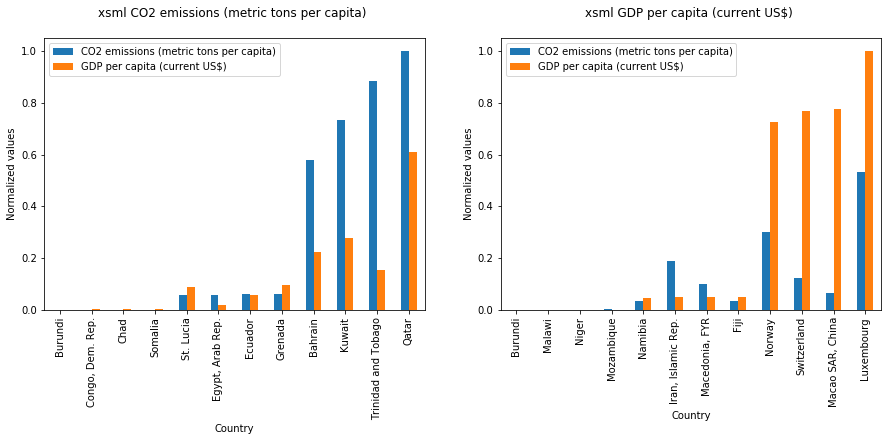

In [13]:
xsml(data,  ['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'], [2010, 2017], 4)

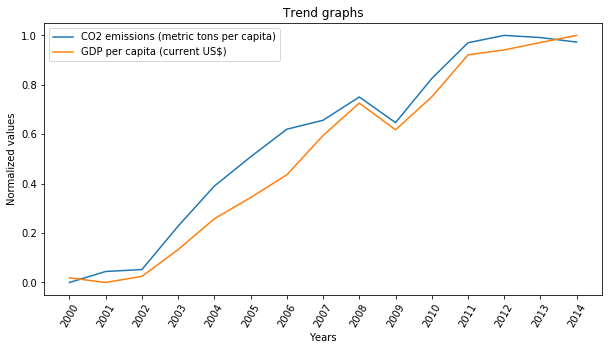

In [14]:
trend_years(data, ['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'], 'World', [2000, 2017])

#### Análise: 
A questão em torno da emissão de CO2 é semelhante a da energia elétrica, o aumento da demanda por produto e o estil de vida das pessoas exigi o aumento da produção que baseada na industria emite maior quantidade de CO2. O movimento "vai e vem" dos países ao longo do tempo é gerado por políticas ambientais que custumam surgir quando quando o país alcança certo patamar de desenvolvimento que o leva a diminuir as emissões e tentar manter o nível de pib. Para prosseguir façamos um modelo preditivo de PIB.

### Correlação entre crédito fornecido pelo setor privado e PIB per capita

#### [Link para animação](https://plot.ly/~Felvc027/38/)

In [15]:
scatter(data, ['Domestic credit to private sector (% of GDP)', 'GDP per capita (current US$)'], [2012, 2017])

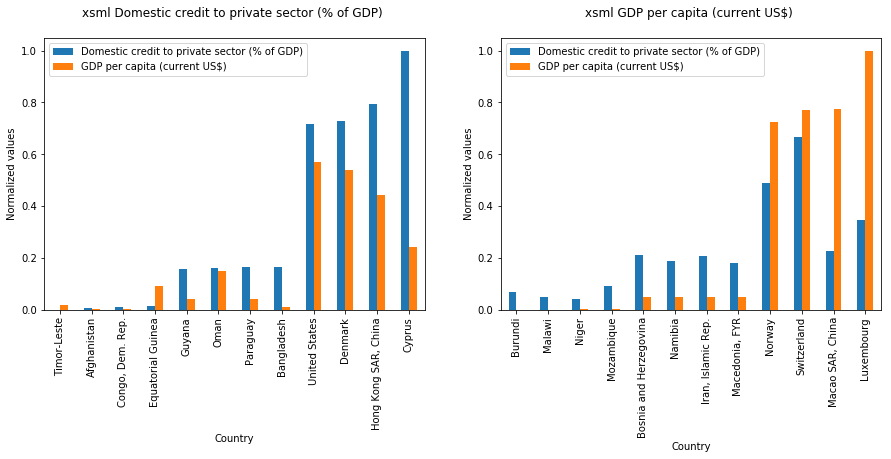

In [16]:
xsml(data,  ['Domestic credit to private sector (% of GDP)', 'GDP per capita (current US$)'], [2012, 2017], 4)

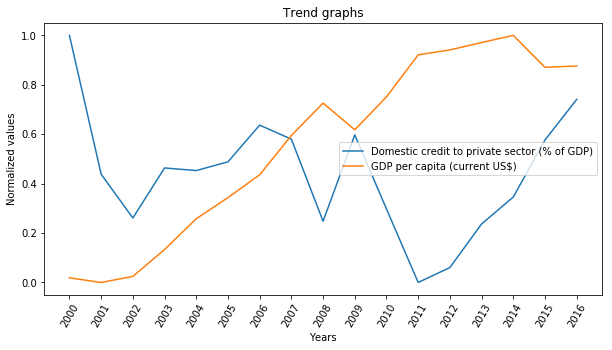

In [17]:
trend_years(data, ['Domestic credit to private sector (% of GDP)', 'GDP per capita (current US$)'], 'World', [2000, 2017])

#### Análise: 
Os sistemas bancários e financeiros aumentam o crescimento e combatem a pobreza, possibilitando o uso de empréstimos para financiar investimento e consumo na economia. Como os fluxos de capital são grandes entre os países a estabilidade do sistema financeiro acarreta bons resultados no PIB, enquanto a instabilidade gera problemas. Contudo, apesar da correlação esses dois indices solos não conseguem explicar o aumento do PIB, de forma que utilizaremos mais um dataset, o de liberdade econômica para explorar o modo como a facilidade de obter crédito para iniciar negócios dentre outros fatores possam explicar o PIB per capita.

Além disso, nota-se que as curvas que melhor se ajustam a relação entre os indicadores aqui apresentados e o PIB per capita possuem formato de curva com derivada descrescente, mostrando que os retornos marginais das tecnologias e políticas financeiras tem impacto menor no PIB enquanto aumento ao longo do tempo, mostrando a necessidade da inovação para novas choques positivos no PIB.

### Correlação entre liberdade econômica e PIB per capita

In [18]:
scatter(data, ['Economic freedom', 'GDP per capita (current US$)'], [2017, 2017])

### Modelo preditivo para o PIB per capita a partir da emissão de CO2 e o PIB per capita do ano anterior

In [19]:
codigos_apresentacao.func6()

#### Analise:
Dada a correlação mostrada entre CO2 e GDP per capita, buscamos então encontrar um modelo que relacionasse a esses dois indices buscando predizer o PIB per Capita do ano seguinte dado o PIB per capita do ano anterior e o índice de emissão de CO2 daquele ano. A primeira ideia, usando o conceito de simplicidade primeiro, buscamos relacioná-los linearmente usando Regressão Linear.
O treinamento foi feito usando os dados de 2001 a 2013 de GDP per capita (2001 a 2012 para treino e de 2002 a 2013 para supervisão) e os dados de 2002 a 2013 de emissão de CO2
Após conseguirmos treinar um modelo para cada país disponível, buscamos fazer a validação usando os dados de GDP 2013 e CO2 2014 para prever, para cada país, o GDP per capita de 2014. Os resultados são mostrados no gráfico a seguir:

## Conclusão: 
Podemos concluir que apesar do PIB ser influenciado por choques na economia, como vimos na taxa de juros americana, é possível encontrar correlações entre indices e indicadores a qual possamos criar um modelo preditivo para o PIB.